# Importación de librerias

In [3]:
# Pandas
import pandas as pd
# Matplotlib
import matplotlib.pyplot as plt
# Seaborn
import seaborn as sns

# Importación de dataset

In [4]:
hotel = pd.read_csv('./ReservaHotel.csv')

### Análisis del dataset

In [ ]:
hotel.shape

In [ ]:
hotel.head(5)

In [ ]:
hotel.dtypes

In [11]:
#Unificacion de personas y noches
hotel['total_persons'] = hotel['no_of_adults'] + hotel['no_of_children']
hotel['total_nights']= hotel['no_of_week_nights'] + hotel['no_of_weekend_nights']

In [62]:
hotel_total = hotel.drop(columns=['no_of_adults','no_of_children','no_of_week_nights','no_of_weekend_nights','Booking_ID'])


In [ ]:
hotel_total

# Gráficos
    Se utilizara el dataframe "hotel_total", el cual se armo sumando el total de personas y el total de dias de reserva.

## Matplotlib

In [17]:
# Cambio de estilo
plt.style.use('bmh')

In [ ]:
status=hotel_total.booking_status.value_counts()
status

In [87]:
reservas=hotel_total.groupby('booking_status')

In [ ]:
segmento=hotel_total.market_segment_type.value_counts()

#### Gráfico 1

Text(0.5, 0, 'Estado')

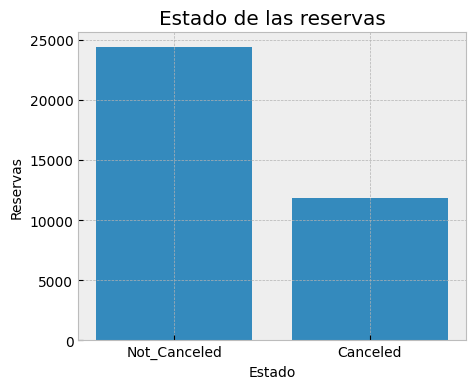

In [79]:
fig, st = plt.subplots(figsize=(5,4))
st.bar(status.index, status)
st.set_title('Estado de las reservas')
st.set_ylabel('Reservas')
st.set_xlabel('Estado')

*En este gráfico se visualiza la cantidad de reservas por estado.*

#### Gráfico 2

Text(0.5, 0, 'Valor Promedio')

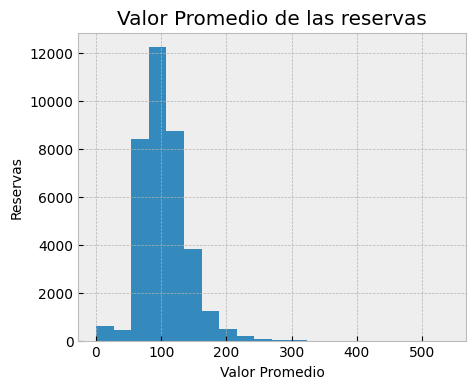

In [84]:
fig, pr = plt.subplots(figsize=(5,4))
pr.hist(x= hotel_total.avg_price_per_room, bins= 20)
pr.set_title('Valor Promedio de las reservas')
pr.set_ylabel('Reservas')
pr.set_xlabel('Valor Promedio')

*Aqui se visualiza un histograma con el valor promedio de las reservas.*

#### Gráfico 3

Text(0.5, 1.0, 'Piechart de distribucion de origen de reservas')

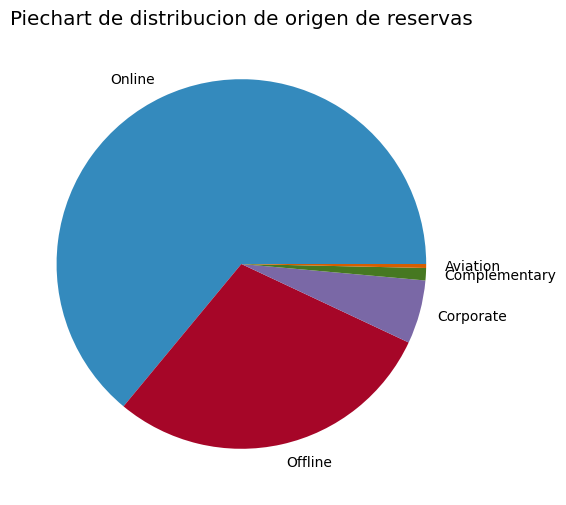

In [144]:
fig, sg = plt.subplots(figsize = (6,6))
sg.pie(segmento.values, labels = segmento.index)
sg.set_title('Piechart de distribucion de origen de reservas')

*Aqui podemos ver como fue la segmentación de las reservas según el tipo.*

## Seaborn

#### Gráfico 1

<Axes: xlabel='market_segment_type', ylabel='total_persons'>

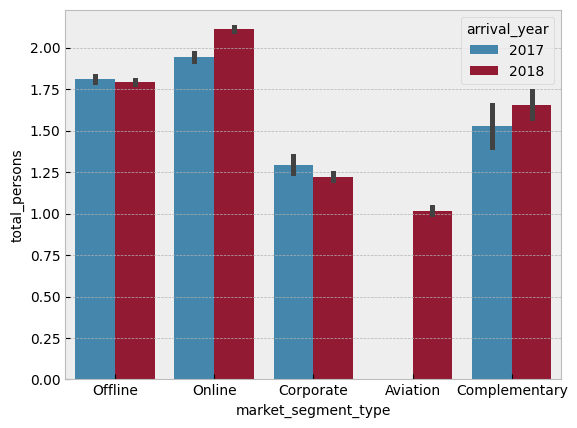

In [160]:
sns.barplot(data=hotel_total, x='market_segment_type', y='total_persons', hue = 'arrival_year')

*Promedio de personas que viajan de acuedo al tipo de segmento asociado durante los años 2017 y 2018.*

#### Gráfico 2

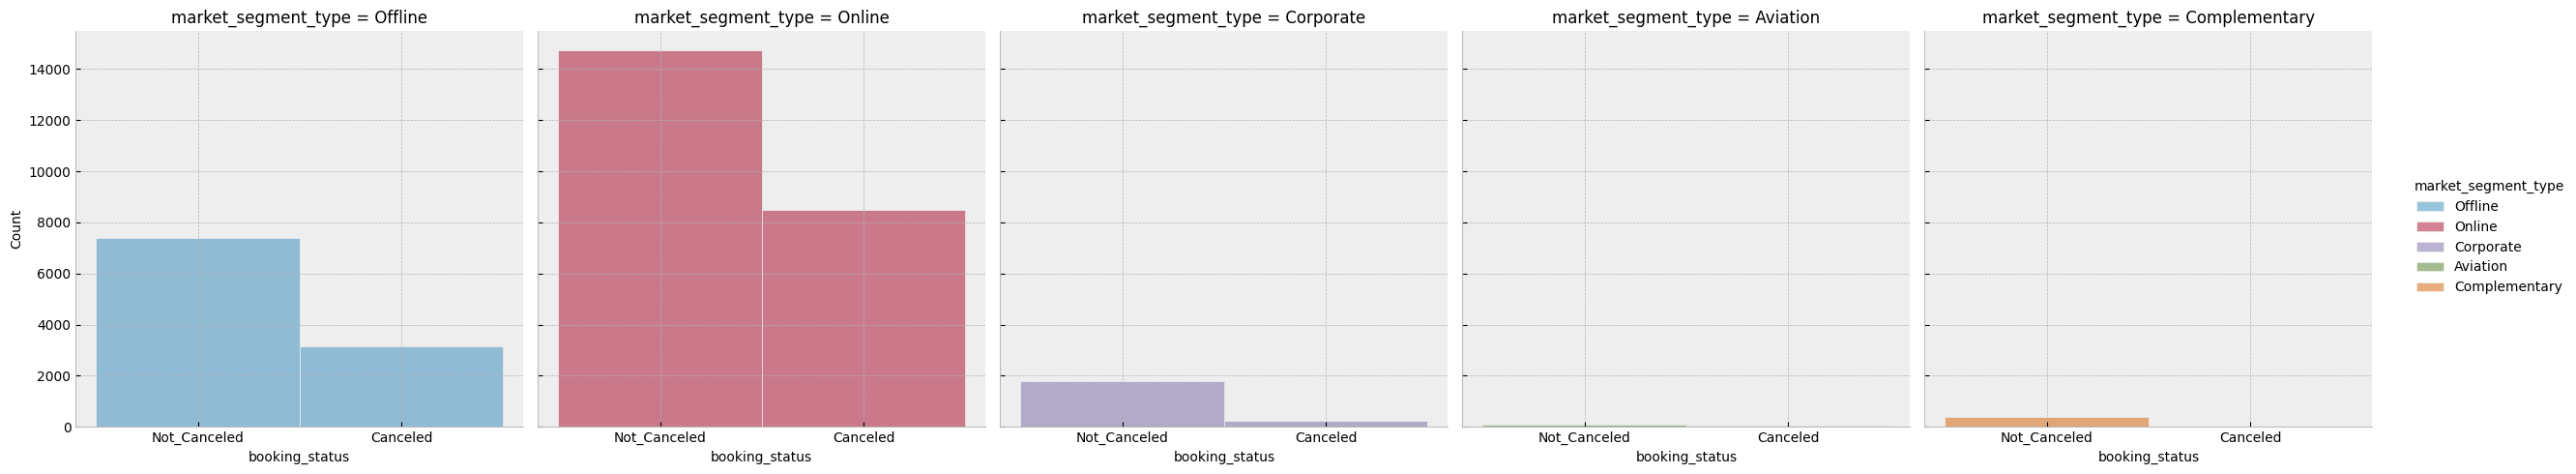

In [165]:
sns.displot(data=hotel_total,x='booking_status', hue='market_segment_type', col='market_segment_type')

*De acuedo a la segmentación de mercado, el total de reservas canceladas y no canceladas.*

#### Gráfico 3

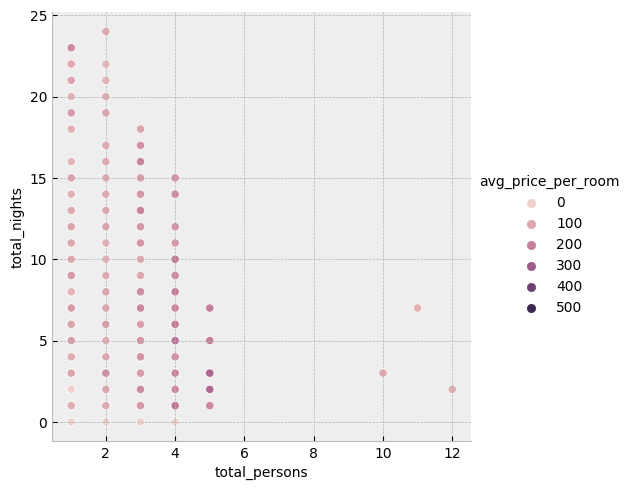

In [169]:
sns.relplot(data=hotel_total, x='total_persons', y='total_nights', hue='avg_price_per_room')

*En este gráfico visualizamos la relación que existe entre la cantidad de personas y el total de noches por el que se realizan las reservas. Adicionalmente se añade una diferenciación para los precios promedios por habitación.*